In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph(nx.erdos_renyi_graph(10, 0.5))
#We personalize it for node 0
personalization_dict = {id:0 for id in G.nodes()}
personalization_dict[0] = 1
pr = nx.pagerank(G)
pr = nx.pagerank(G, alpha=0.85, personalization=personalization_dict)

In [2]:
#Here we obtain the node2vec embedding of a graph
from node2vec import Node2Vec
import networkx as nx
G = nx.erdos_renyi_graph(100, 0.5)
node2vec = Node2Vec(G, seed=128)
model = node2vec.fit(seed=129)

/Users/miguelangel/anaconda3/envs/social_nets/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 40.03it/s]


In [1]:
import numpy as np
a = np.linspace(0.05, 0.95, 10)
b = np.linspace(0.2, 0.8, 7)

In [2]:
list_zip = list(zip(a, b))

In [3]:
list_zip

[(0.05, 0.2),
 (0.15, 0.30000000000000004),
 (0.25, 0.4),
 (0.35, 0.5),
 (0.44999999999999996, 0.6000000000000001),
 (0.5499999999999999, 0.7000000000000002),
 (0.65, 0.8)]

In [1]:
from modules.random_graph import LFRBenchmark

#We can generate a graph with the LFR benchmark
n = 400
homophily = 0.95
modularity = 0.05

lfr1 = LFRBenchmark(n, homophily=0.95, modularity=0.05, init_opinions=True)
lfr2 = LFRBenchmark(n, homophily=0.20, modularity=0.05, init_opinions=True)
lfr3 = LFRBenchmark(n, homophily=0.80, modularity=0.95, init_opinions=True)
lfr4 = LFRBenchmark(n, homophily=0.20, modularity=0.95, init_opinions=True)


In [3]:
#Here we obtain the clustering coefficient of a graph
import networkx as nx
lfr1 = LFRBenchmark(n, homophily=0.95, modularity=0.95, init_opinions=True)
nx.average_clustering(lfr1.G)

0.07242872961523492

In [4]:
from modules.recommender import Recommender

page_rank_recommender = Recommender('pagerank')
wtf_recommender = Recommender('wtf')
oba_recommender = Recommender('oba')

In [5]:
pr_node_recommendation = page_rank_recommender.top_k_recommendation(lfr1.G, 1, 5)

In [6]:
pr_node_recommendation

[193, 257, 172, 158, 310]

In [7]:
wtf_node_recommendation = wtf_recommender.top_k_recommendation(lfr1.G, 1, 5)

In [18]:
import numpy as np
non_neighbors = list(nx.non_neighbors(lfr1.G, 1))
#Here we obtain the difference in opinion between the node and the non-neighbors
diff_opinion = [abs(lfr1.G.nodes[1]['opinion'] - lfr1.G.nodes[non_neighbor]['opinion']) for non_neighbor in non_neighbors]
#Here we normalize the difference in opinion
diff_opinion =np.array(diff_opinion)/np.sum(diff_opinion)

In [14]:
nx.get_node_attributes(lfr1.G, 'opinion')

{0: 0.041593443747687364,
 1: 0.5257450267964505,
 2: 0.11942846158833154,
 3: 0.3460170718855806,
 4: 0.6014424381923764,
 5: 0.6021133114626169,
 6: 0.8637095049087515,
 7: 0.6819203400528704,
 8: 0.056958293948239036,
 9: 0.6014424381923764,
 10: 0.6454746004955415,
 11: 0.6454746004955415,
 12: 0.7853700877691866,
 13: 0.6454746004955415,
 14: 0.131408478173487,
 15: 0.6014424381923764,
 16: 0.131408478173487,
 17: 0.23892433469051455,
 18: 0.6454746004955415,
 19: 0.6021133114626169,
 20: 0.2631448495974139,
 21: 0.8700801463841696,
 22: 0.10972378522258008,
 23: 0.10972378522258008,
 24: 0.23892433469051455,
 25: 0.1630114300081673,
 26: 0.6454746004955415,
 27: 0.7804477519526738,
 28: 0.23729137949946733,
 29: 0.10972378522258008,
 30: 0.8730340559447861,
 31: 0.131408478173487,
 32: 0.8666370428503979,
 33: 0.041593443747687364,
 34: 0.05316830801174932,
 35: 0.10972378522258008,
 36: 0.33429937148835265,
 37: 0.37198491374445863,
 38: 0.464268038031595,
 39: 0.109723785222580

In [15]:
from scipy import stats
x, y = [1, 2, 3, 4, 5, 6, 7], [10, 9, 2.5, 6, 4, 3, 2]
res = stats.pearsonr(x, y)

In [17]:
res[0]

-0.8285038835884277

In [13]:
list(nx.get_node_attributes(lfr1.G, 'opinion').values())

[0.041593443747687364,
 0.5257450267964505,
 0.11942846158833154,
 0.3460170718855806,
 0.6014424381923764,
 0.6021133114626169,
 0.8637095049087515,
 0.6819203400528704,
 0.056958293948239036,
 0.6014424381923764,
 0.6454746004955415,
 0.6454746004955415,
 0.7853700877691866,
 0.6454746004955415,
 0.131408478173487,
 0.6014424381923764,
 0.131408478173487,
 0.23892433469051455,
 0.6454746004955415,
 0.6021133114626169,
 0.2631448495974139,
 0.8700801463841696,
 0.10972378522258008,
 0.10972378522258008,
 0.23892433469051455,
 0.1630114300081673,
 0.6454746004955415,
 0.7804477519526738,
 0.23729137949946733,
 0.10972378522258008,
 0.8730340559447861,
 0.131408478173487,
 0.8666370428503979,
 0.041593443747687364,
 0.05316830801174932,
 0.10972378522258008,
 0.33429937148835265,
 0.37198491374445863,
 0.464268038031595,
 0.10972378522258008,
 0.041593443747687364,
 0.6454746004955415,
 0.10676142421646362,
 0.8666370428503979,
 0.041593443747687364,
 0.11942846158833154,
 0.25252249737

In [8]:
wtf_node_recommendation

[0, 5, 3, 2, 4]

In [9]:
oba_node_recommendation = oba_recommender.top_k_recommendation(lfr1.G, 1, 5)

In [10]:
oba_node_recommendation

[145, 367, 140, 280, 325]

In [8]:
from modules.PROD import PROD

number_of_edges = lfr1.G.number_of_edges()
rmax = 0.4*number_of_edges
print(rmax)
tmax = 5000
s = 2

prod = PROD(lfr1.G, "pagerank", s, rmax, tmax)

1700.8000000000002


In [12]:
prod.run()

0.0008504000000000001


100%|██████████| 5000/5000 [00:16<00:00, 298.77it/s]


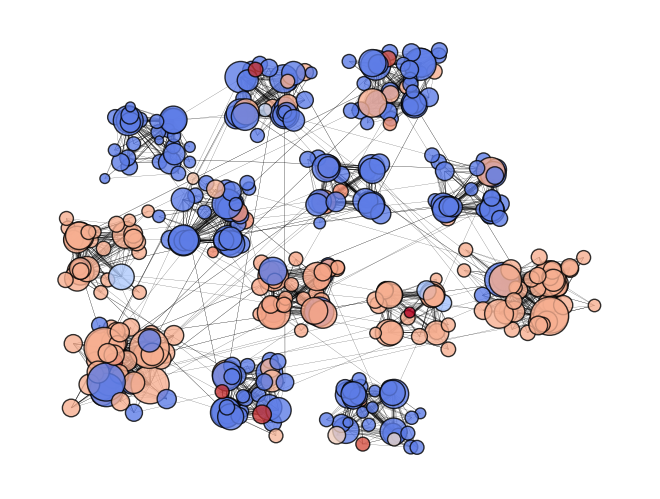

In [13]:
lfr1.plot_graph(init_opinions=False)

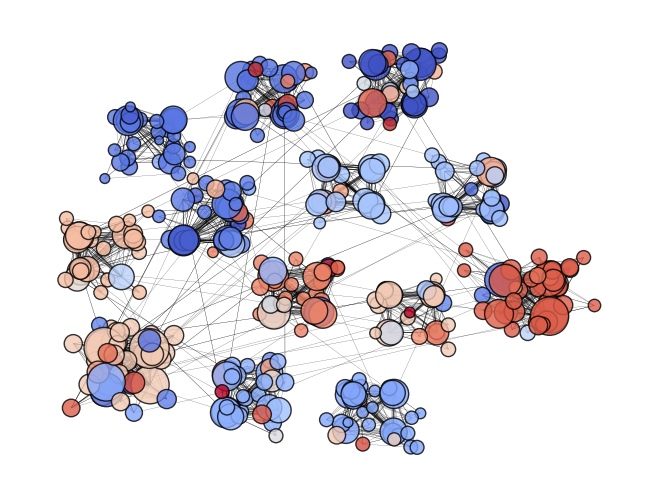

In [14]:
lfr1.plot_graph(init_opinions=True)

Text(0.5, 0, '$\\eta = 0.20$')

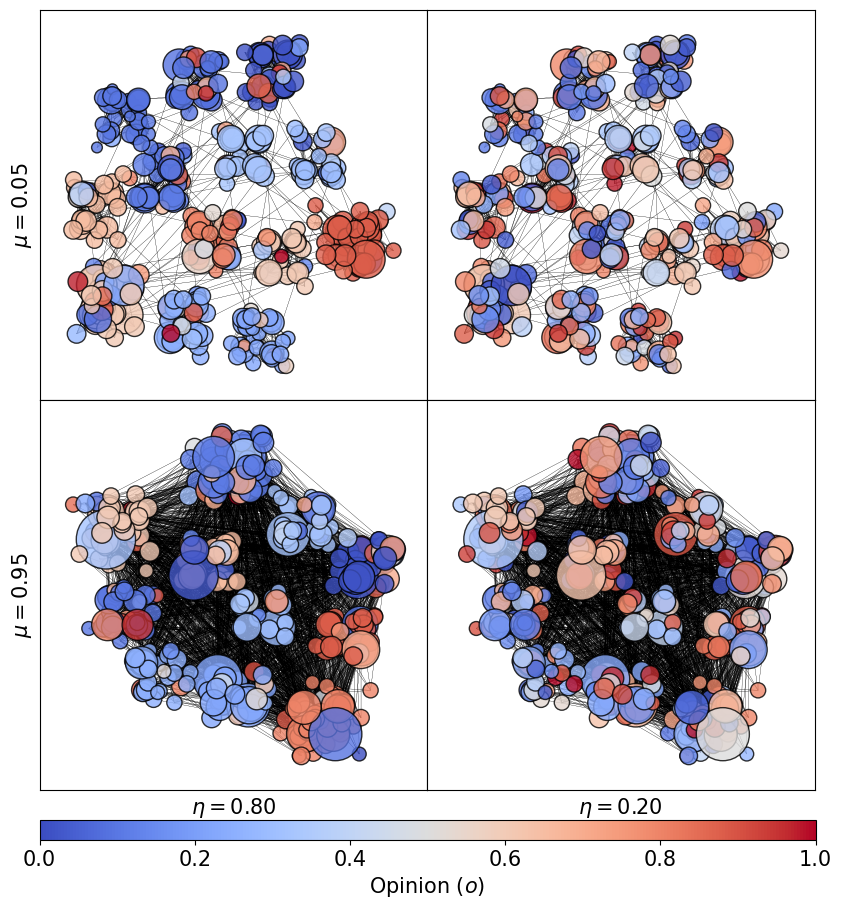

In [9]:
#Here we plot the graph and color by opinion, size proportional to degree, fruchterman_reingold layout
import matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
lfr1.plot_graph(ax=axs[0, 0])
lfr2.plot_graph(ax=axs[0, 1])
lfr3.plot_graph(ax=axs[1, 0])
lfr4.plot_graph(ax=axs[1, 1])
#Here we add a colorbar at the bottom for all the plots that spans the width of the figure
fig.subplots_adjust(bottom=0.1,
                    wspace=0,
                    hspace=0)
cbar_ax = fig.add_axes([0.125, 0.05, 0.776, 0.02])
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=1),cmap="coolwarm"),cax=cbar_ax,orientation="horizontal")
cb.set_label("Opinion $(o)$", size=15)
cb.ax.tick_params(labelsize=15)
axs[0,0].set_ylabel("$\mu = 0.05$", size=15)
axs[1,0].set_ylabel("$\mu = 0.95$", size=15)
axs[1,0].set_xlabel("$\eta = 0.80$", size=15)
axs[1,1].set_xlabel("$\eta = 0.20$", size=15)
#plt.savefig("lfr_benchmark.png", dpi = 300, bbox_inches='tight')

In [22]:
np.linspace(0.2, 0.8, 7)

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])